## WOA Dissolved Oxygen: 
The total amount of dissolved oxygen in the ocean. This can fluctuate based on geochemical processes like marine productivity, oxidation, and respiration. It is also controlled by processes like gas solubility, mixing at depths, and anthropogenic effects. WOA provides dissolved O2 on different time scales. 

## WOA Apparent Oxygen Utilization: 
% oxygen satuation minus actual dissolved oxygen. 

## WOA Percent Oxygen Saturation: 
The actual amount of dissolved oxygen in the ocean vs maximum amount.

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cmocean 

from matplotlib import pyplot as plt
import matplotlib.path as mpath 
from cartopy import crs as ccrs, feature as cfeature 
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
woa18_o2 = xr.open_zarr('../data/woa18/woa_oxygen_dissolved_all',decode_times=False).dissolved
woa18_o2_sat = xr.open_zarr('../data/woa18/woa_oxygen_saturation_all',decode_times=False).oxygen_saturation
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou

In [4]:
woa18_o2

<xarray.DataArray 'dissolved' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-dissolved, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for mole_concentration_o...
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          micromoles_per_kilogram

In [5]:
woa18_o2_sat

<xarray.DataArray 'oxygen_saturation' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-oxygen_saturation, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for fractional_saturatio...
    standard_name:  fractional_saturation_of_oxygen_in_seawater
    units:          percent

In [6]:
woa18_aou

<xarray.DataArray 'aou' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-aou, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for Apparent_Oxygen_Util...
    standard_name:  Apparent_Oxygen_Utilization
    units:          micromoles_per_kilogram

In [7]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

In [8]:
#separating all the ocean basins
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) 
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

In [9]:
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, 65, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [12]:
woa18_aou_arctic

<xarray.DataArray (depth: 102, lat: 180, lon: 360)>
dask.array<mul, shape=(102, 180, 360), dtype=float64, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'WOA18 AOU Arctic Ocean at Surface')

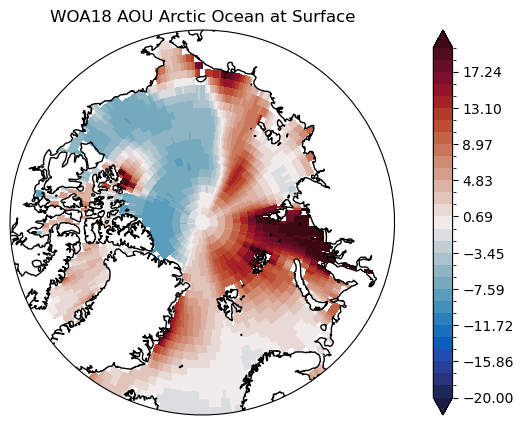

In [13]:
North_Polar(woa18_aou_arctic.isel(depth=0),-20,20,cmocean.cm.balance)
plt.title('WOA18 AOU Arctic Ocean at Surface')

Text(0.5, 1.0, 'WOA18 O2 Arctic Ocean at Surface')

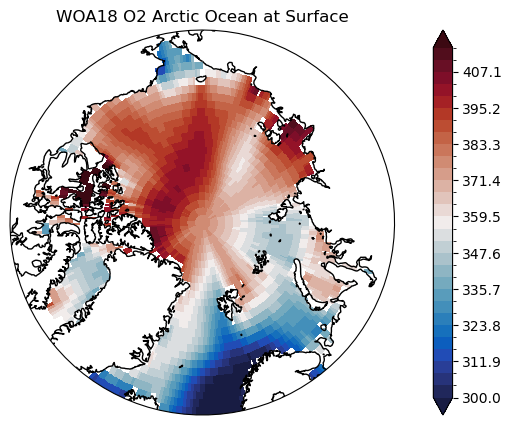

In [14]:
North_Polar(woa18_o2_arctic.isel(depth=0),300,415,cmocean.cm.balance)
plt.title('WOA18 O2 Arctic Ocean at Surface')

Text(0.5, 1.0, 'WOA18 O2 Sat Ocean at Surface')

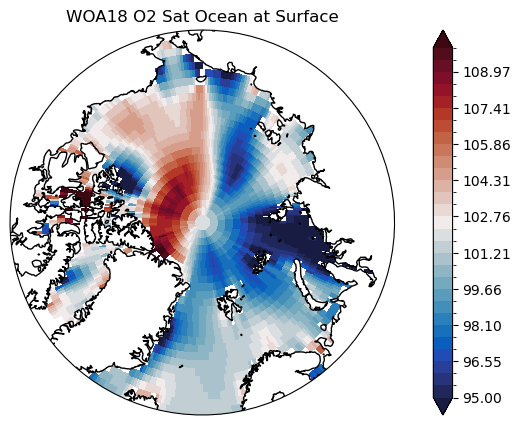

In [15]:
North_Polar(woa18_o2sat_arctic.isel(depth=0),95,110,cmocean.cm.balance)
plt.title('WOA18 O2 Sat Ocean at Surface')

Text(0.5, 1.0, 'Ocean Basin Mask')

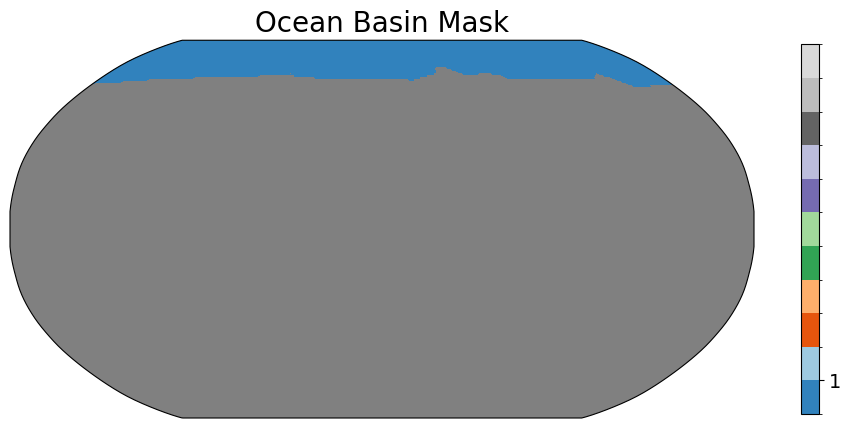

In [16]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = arcticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [17]:
woa18_aou_arctic = woa18_aou*arcticocean
woa18_o2_arctic = woa18_o2*arcticocean
woa18_o2sat_arctic = woa18_o2_sat*arcticocean

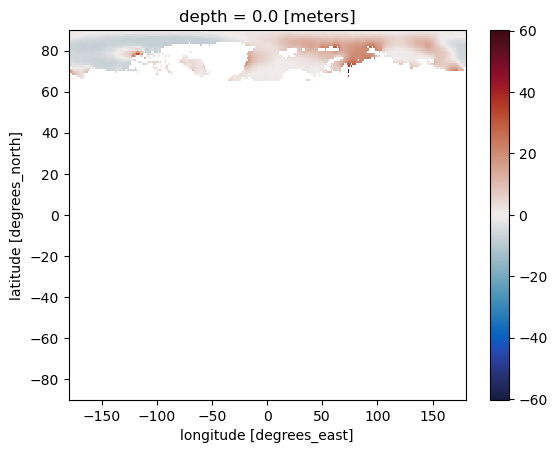

In [18]:
woa18_aou_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

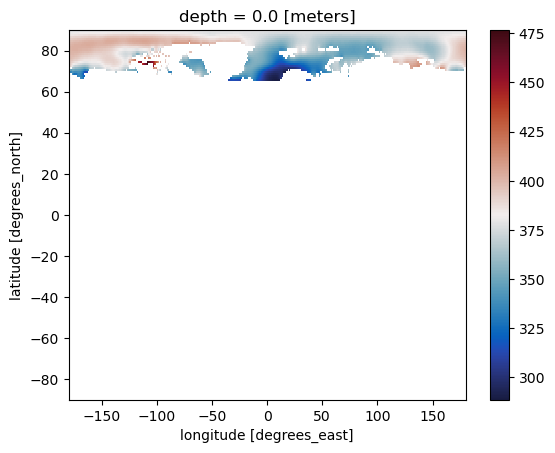

In [19]:
woa18_o2_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

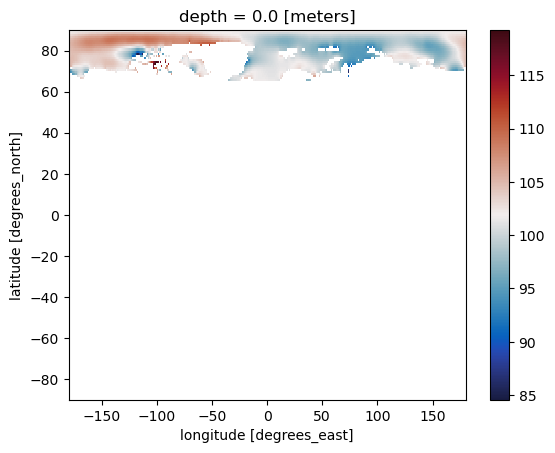

In [20]:
woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance)

Text(0.5, 1.0, 'WOA AOU [μmol/kg]')

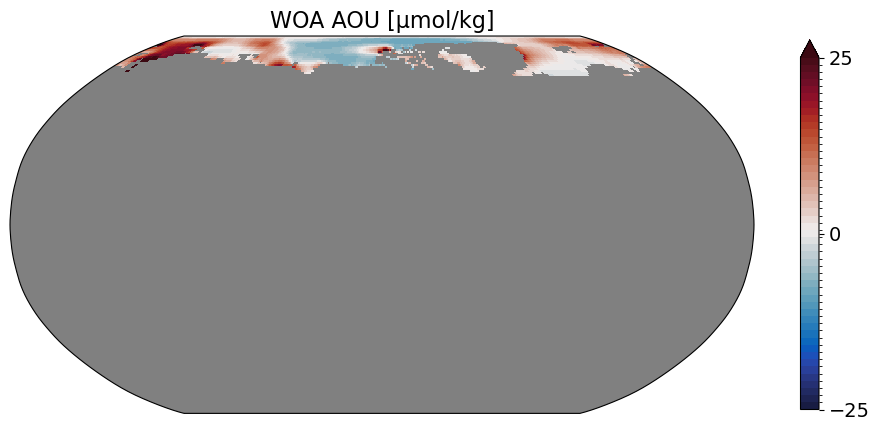

In [21]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_aou_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=-25, vmax=25, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 [μmol/kg]')

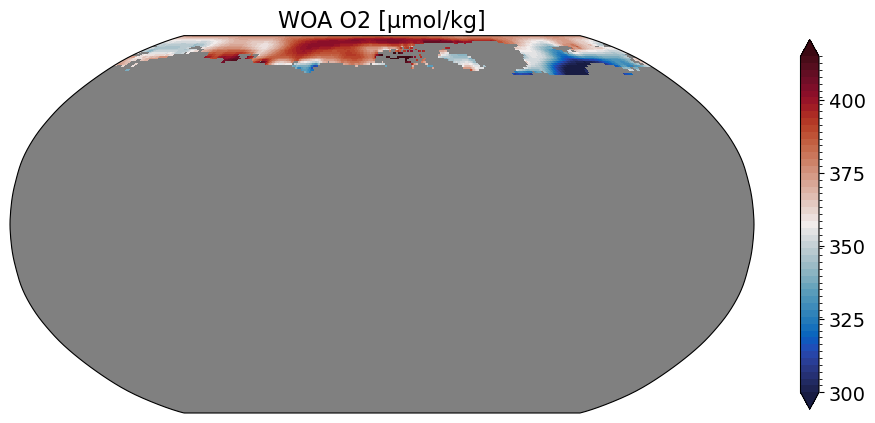

In [22]:
#arctic dissolved oxygen map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=300, vmax=415, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[300,325,350,375,400,425], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat [μmol/kg]')

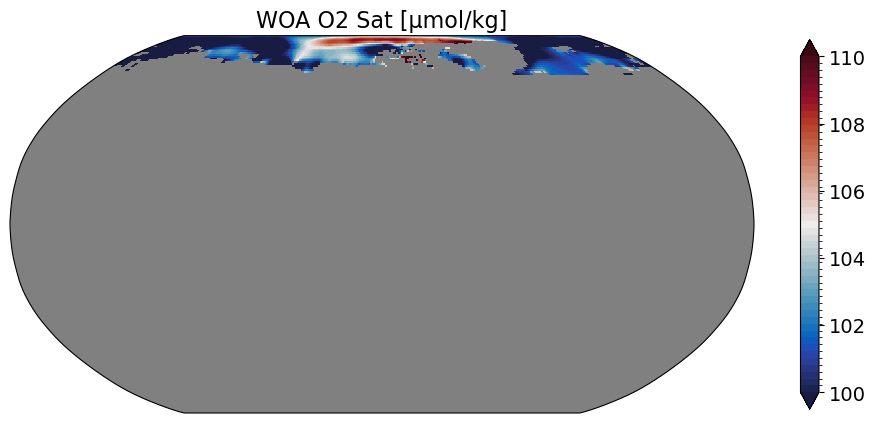

In [23]:
#arctic oxygen saturation map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=100, vmax=110, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[100,102,104,106,108,110], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'Ocean Basin Mask')

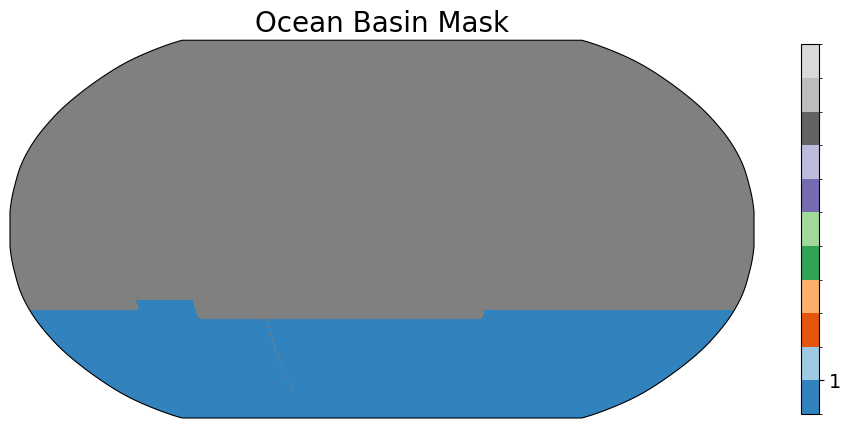

In [24]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [25]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

Text(0.5, 1.0, 'WOA18 AOU Southern Ocean at Surface')

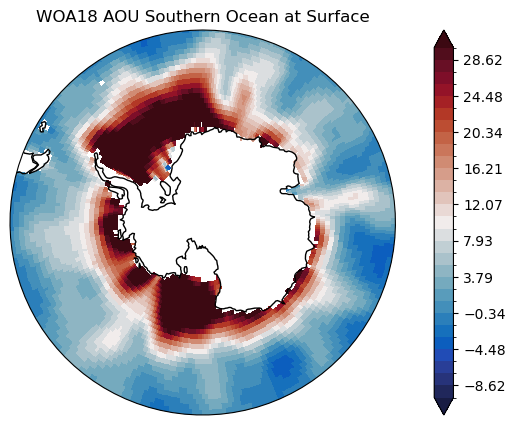

In [28]:
South_Polar(woa18_aou_southernocean.isel(depth=0),-10,30,cmocean.cm.balance)
plt.title('WOA18 AOU Southern Ocean at Surface')

Text(0.5, 1.0, 'WOA18 O2 at Southern Ocean at Surface')

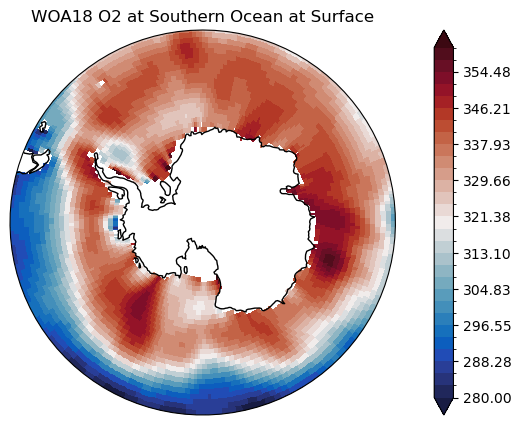

In [29]:
South_Polar(woa18_o2_southernocean.isel(depth=0),280,360,cmocean.cm.balance)
plt.title('WOA18 O2 at Southern Ocean at Surface')

Text(0.5, 1.0, 'WOA18 O2 SAT Southern Ocean at Surface')

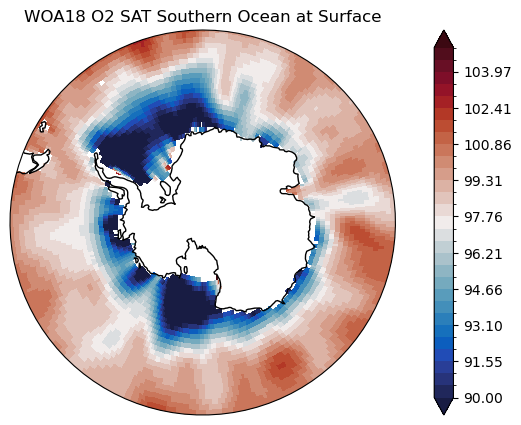

In [30]:
South_Polar(woa18_o2sat_southernocean.isel(depth=0),90,105,cmocean.cm.balance)
plt.title('WOA18 O2 SAT Southern Ocean at Surface')

In [31]:
woa18_aou_southernocean = woa18_aou*southernocean
woa18_o2_southernocean = woa18_o2*southernocean
woa18_o2sat_southernocean = woa18_o2_sat*southernocean

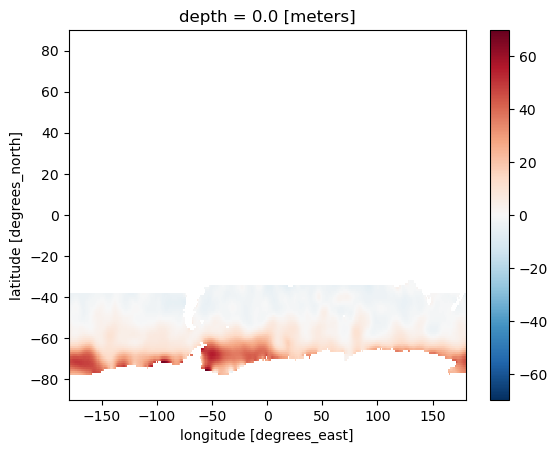

In [32]:
woa18_aou_southernocean.isel(depth=0).plot()

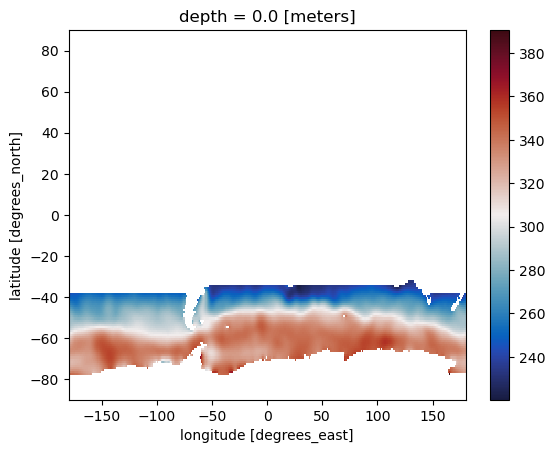

In [33]:
woa18_o2_southernocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

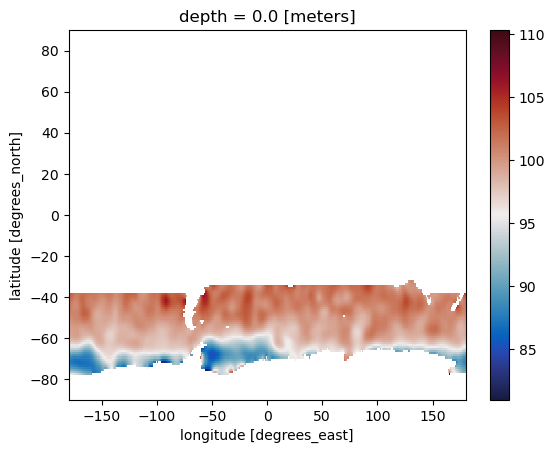

In [34]:
woa18_o2sat_southernocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

Text(0.5, 1.0, 'WOA O2 Sat Southern Ocean [μmol/kg]')

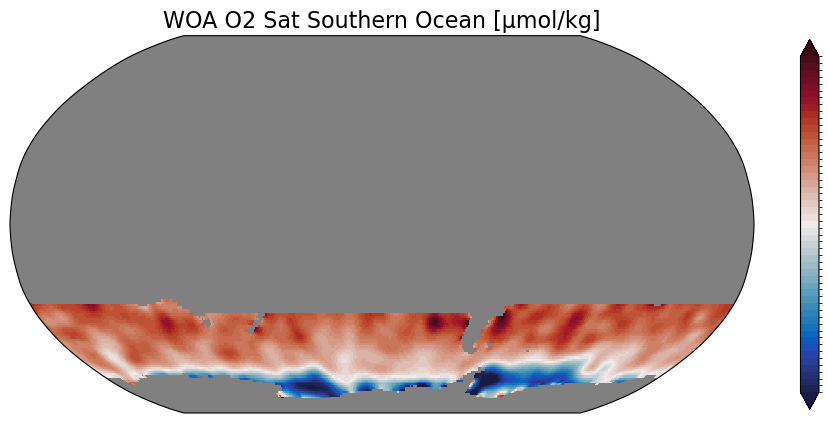

In [35]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2satS = woa18_o2sat_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=87, vmax=106, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(o2satS, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat Southern Ocean [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA AOU by Basin [μmol/kg]')

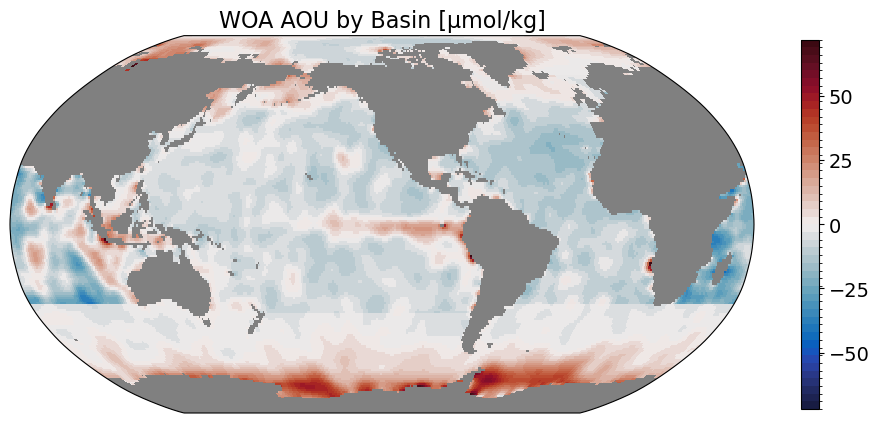

In [42]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

aouS = woa18_aou_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouAr = woa18_aou_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouAt = woa18_aou_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouP = woa18_aou_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

aouI = woa18_aou_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(aouS, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU by Basin [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 by Basin [μmol/kg]')

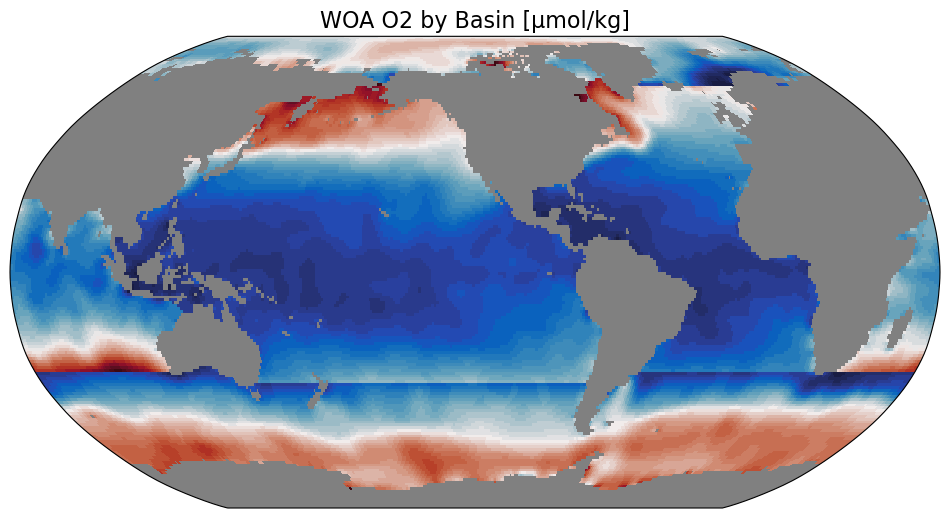

In [45]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2S = woa18_o2_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Ar = woa18_o2_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2At = woa18_o2_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2P = woa18_o2_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2I = woa18_o2_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(aouS, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 by Basin [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat by Basin [μmol/kg]')

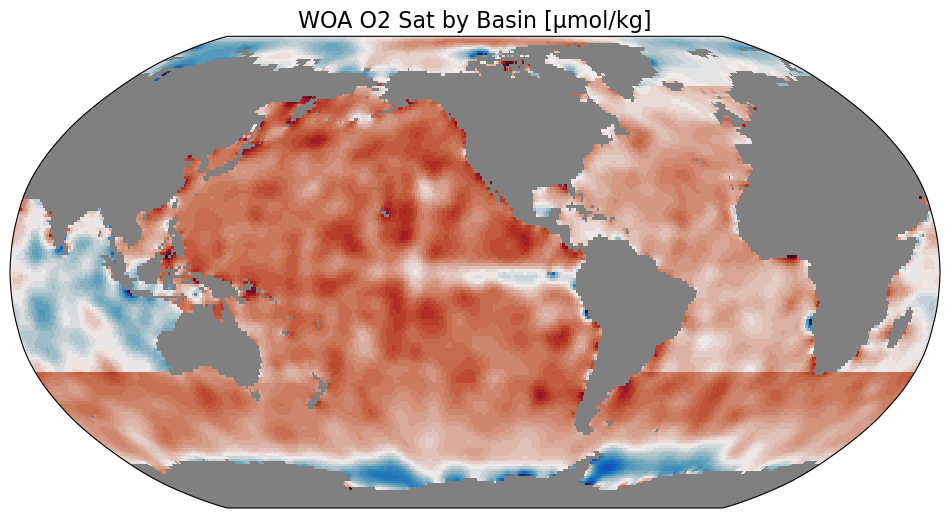

In [47]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

o2satS = woa18_o2sat_southernocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satAr = woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2Asatt = woa18_o2sat_atlanticocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satP = woa18_o2sat_pacificocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

o2satI = woa18_o2sat_indianocean.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(aouS, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat by Basin [μmol/kg]",fontsize=16)

In [37]:
woa18_aou_atlanticocean = woa18_aou*atlanticocean
woa18_o2_atlanticocean = woa18_o2*atlanticocean
woa18_o2sat_atlanticocean = woa18_o2_sat*atlanticocean

In [ ]:
woa18_o2_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [ ]:
woa18_o2sat_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [ ]:
woa18_aou_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [38]:
woa18_aou_pacificocean = woa18_aou*pacificocean
woa18_o2_pacificocean = woa18_o2*pacificocean
woa18_o2sat_pacificocean = woa18_o2_sat*pacificocean

In [ ]:
woa18_aou_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [ ]:
woa18_o2_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [ ]:
woa18_o2sat_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [39]:
woa18_aou_indianocean = woa18_aou*indianocean
woa18_o2_indianocean = woa18_o2*indianocean
woa18_o2sat_indianocean = woa18_o2_sat*indianocean

In [ ]:
woa18_o2_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [ ]:
woa18_o2sat_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [ ]:
woa18_aou_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)